## 8. Model Diagnostics

**Exercise 8.1**.  For an AR(1) model with $\phi \approx 0.5$ and $n = 100$, the lag 1 sample autocorrelation of the residuals is 0.5.  Should we consider this unusual?  Why or why not?

**Solution**.  From Equation (8.1.5),

$$ \text{Var}[\hat{r}_1] \approx \frac{\phi^2}{n} $$

so the standard error of the sample correlation to be approximately 0.05, and we should expect the lag 1 sample autocorrelation to be within 2 standard errors, $\pm 0.1$.  A value of 0.5 is unusual.

**Exercise 8.2**.  Repeat Exercise 8.1 for an MA(1) model with $\theta \approx 0.5$ and and $n = 100$.

**Solution**.  Page 183 indicates that we can replace $\phi$ with $\theta$ for MA(1) models, so

$$ \text{Var}[\hat{r}_1] \approx \frac{\theta^2}{n} $$

Once again the standard error of the sample correlation is approximately 0.05, and we should expect the lag 1 sample autocorrelation to be within 2 standard errors, $\pm 0.1$.  A value of 0.5 is unusual.

**Exercise 8.3**.  Based on a series of length $n = 200$, we fit an AR(2) model and obtain residual autocorrelations of $\hat{r}_1 = 0.13$, $\hat{r}_2 = 0.13$, and $\hat{r}_3 = 0.12$.  If $\hat{\phi}_1 = 1.1$ and $\hat{\phi}_2 = −0.8$, do these residual autocorrelations support the AR(2) specification?  Individually  Jointly?

**Solution**.  Equations (8.1.8), (8.1.9) and (8.1.10) state that, for the AR(2) model,

$$
\text{Var}[\hat{r}_1] \approx \frac{\phi_2^2}{n},
\quad
\text{Var}[\hat{r}_2] \approx \frac{\phi_2^2 + \phi_1^2(1 + \phi_2)^2}{n},
\quad
\text{Var}[\hat{r}_k] \approx \frac{1}{n} \quad \text{for } k \geq 3
$$

Replacing in the given values, we get

$$
2 \sqrt{\text{Var}[\hat{r}_1]} \approx 0.113,
\quad
2 \sqrt{\text{Var}[\hat{r}_2]} \approx 0.117,
\quad
2 \sqrt{\text{Var}[\hat{r}_k]} \approx 0.141 \quad \text{for } k \geq 3
$$

The residual autocorrelations for $\hat{r}_1$ and $\hat{r}_2$ are above those thresholds, while the residual autocorrelation for $\hat{r}_3$ is under the corresponding threshold.

The Ljung-Box statistic is

$$ Q_* = n(n+2) \left( \frac{\hat{r}_1^2}{n - 1} + \frac{\hat{r}_2^2}{n - 2} + \frac{\hat{r}_3^2}{n - 3} \right) $$

which, replacing values, gives $Q_* \approx 9.832$.  If the AR(2) speficication is correct, then $Q_*$ should have approximately a chi-square distribution with 3 - 2 = 1 degree of freedom.  But $\text{Pr}[\chi_1^2 > Q_*] \approx 0.0017$, so the residual correlations are jointly too large to support the AR(2) specification at p-value 0.01.

In [1]:
n = 200
r1 = 0.13
r2 = 0.13
r3 = 0.12
Qstar = n * (n + 2) * (r1**2/(n-1) + r2**2/(n-2) + r3**2/(n-3))
print(Qstar)

[1] 9.832334


In [2]:
print(1 - pchisq(Qstar, df=1))

[1] 0.001714706


**Exercise 8.4**.  Simulate an AR(1) model with $n = 30$ and $\phi = 0.5$.

**(a)** Fit the correctly specified AR(1) model and look at a time series plot of the residuals.  Does the plot support the AR(1) specification?

**(b)** Display a normal quantile-quantile plot of the standardized residuals.  Does the plot support the AR(1) specification?

**(c)** Display the sample ACF of the residuals.  Does the plot support the AR(1) specification?

**(d)** Calculate the Ljung-Box statistic summing to $K = 8$.  Does this statistic support the AR(1) specification?

**Solution**.

In [3]:
set.seed(1000)
Y = arima.sim(model=list(ar=0.5), n=30)

**(a)**

In [4]:
model = arima(Y, order=c(1,0,0), method='ML')

In [5]:
require(ggplot2)
require(latex2exp)

Loading required package: ggplot2

Loading required package: latex2exp



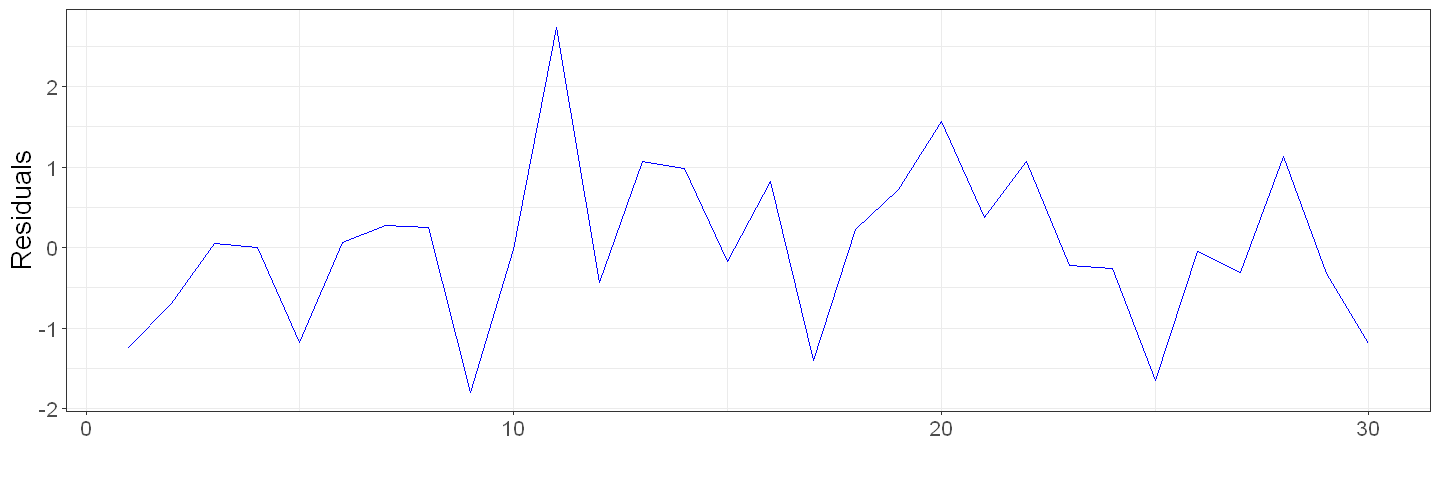

In [6]:
options(repr.plot.width=12, repr.plot.height=4)

ggplot() + 
  geom_line(aes(x=1:length(Y), y=c(model$resid)), color='blue', na.rm=T) +
  xlab('') + ylab('Residuals') +
  theme_bw() + theme(text = element_text(size=16))

Residuals look random.

**(b)**

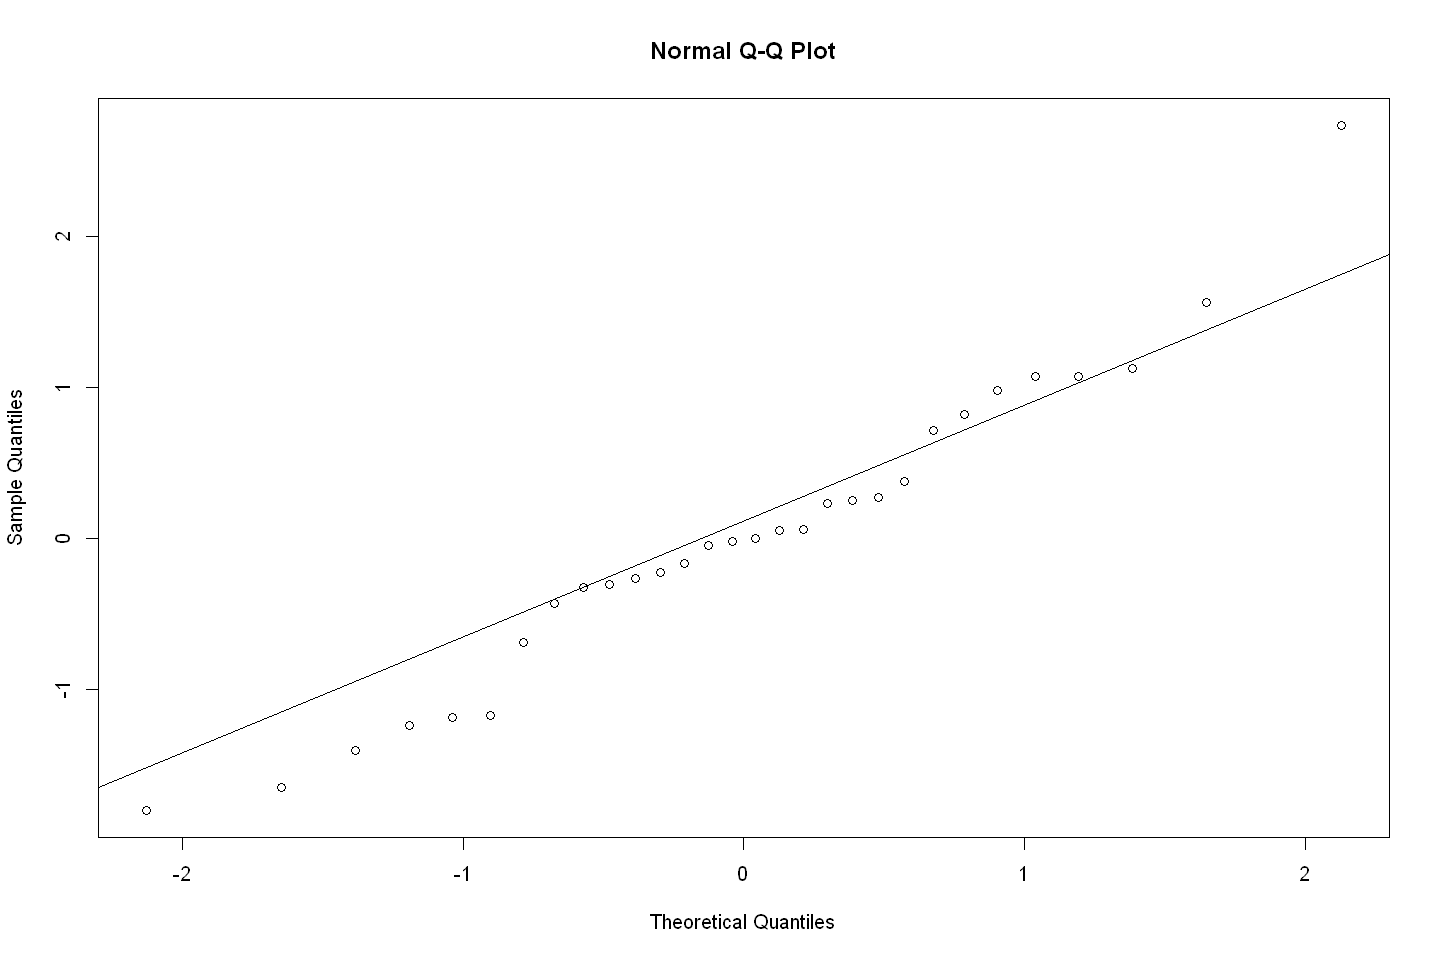

In [7]:
options(repr.plot.width=12, repr.plot.height=8)
qqnorm(model$resid); qqline(model$resid)

Tails look suspect on both ends.  Let's do Shapiro-Wilk to verify normality:

In [8]:
shapiro.test(model$resid)


	Shapiro-Wilk normality test

data:  model$resid
W = 0.96858, p-value = 0.5011


The test fails to reject normality.

**(c)**

In [9]:
plot_acf_with_bounds <- function(acf, lower, upper, title='ACF') {
    max_k = length(acf)
    k = seq(1, max_k)
    
    options(repr.plot.width=12, repr.plot.height=4)
    p = ggplot() + geom_ribbon(aes(x=k, ymin=lower, ymax=upper), fill='blue', alpha=0.1) +
        geom_point(aes(x=k, y=acf), color='blue')
    for (i in 1:max_k) {
        p = p + geom_line(aes_string(x=k[i], y=c(0, acf[i])), color='blue')
    }
    p + geom_line(aes(x=k, y=0), color='blue', linetype='dashed') +
        xlab('Lag') + ylab(TeX('$\\rho_k$')) +
        ggtitle(title) +
        theme_bw() + theme(text = element_text(size=16), plot.title = element_text(hjust = 0.5))
}

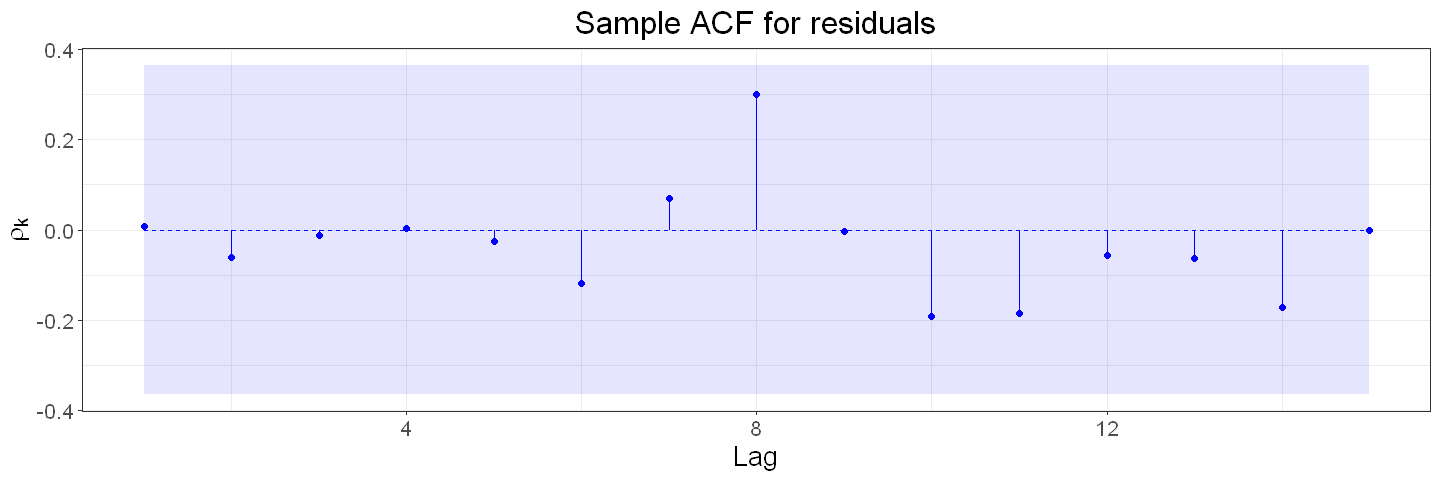

In [10]:
r = acf(model$resid, lag.max=15, plot=F)$acf[-1]
se = 1 / sqrt(length(Y))
plot_acf_with_bounds(r, - 2 * se, + 2*se, title='Sample ACF for residuals')

ACF indicates residuals are random.

**(d)**

In [11]:
ljung.box.test <- function(r, n, k_ar=0, k_ma=0) {
    nlags = length(r)
    denominators = (n-1):(n-nlags)
    Qstar = n * (n-2) * sum(r**2 / denominators)
    df = nlags - k_ar - k_ma
    p_value = 1 - pchisq(Qstar, df=df)
    
    list('X-squared'=Qstar, df=df, 'p-value'=p_value)
}

In [12]:
ljung.box.test(acf(model$resid, lag.max=8, plot=F)$acf[-1], n=length(Y), k_ar=1)

$`X-squared`
[1] 4.27916

$df
[1] 7

$`p-value`
[1] 0.7471206

The test does not reject randomness of error based on the first 8 autocorrelations.

**Exercise 8.5**. Simulate an MA(1) model with $n = 36$ and $\theta = −0.5$.

**(a)** Fit the correctly specified MA(1) model and look at a time series plot of the residuals.  Does the plot support the MA(1) specification?

**(b)** Display a normal quantile-quantile plot of the standardized residuals.  Does the plot support the MA(1) specification?

**(c)** Display the sample ACF of the residuals.  Does the plot support the MA(1) specification?

**(d)** Calculate the Ljung-Box statistic summing to K = 6.  Does this statistic support the MA(1) specification?

**Solution**.

In [13]:
set.seed(2000)
Y = arima.sim(model=list(ma=-0.5), n=36)

**(a)**

In [14]:
model = arima(Y, order=c(0,0,1), method='ML')

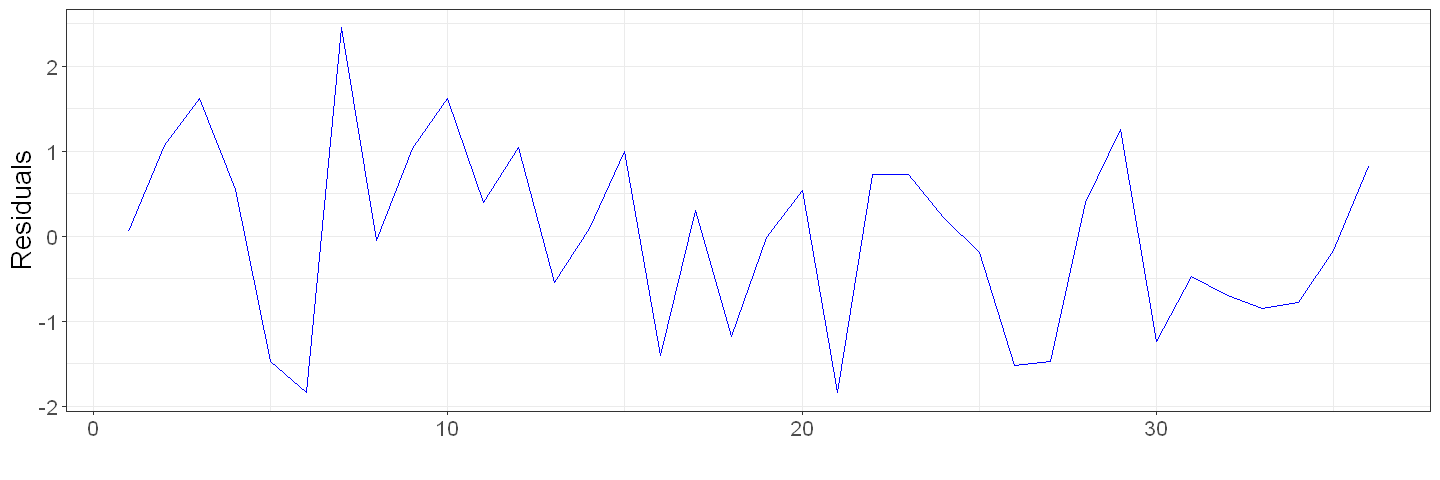

In [15]:
options(repr.plot.width=12, repr.plot.height=4)

ggplot() + 
  geom_line(aes(x=1:length(Y), y=c(model$resid)), color='blue', na.rm=T) +
  xlab('') + ylab('Residuals') +
  theme_bw() + theme(text = element_text(size=16))

Residuals look random.

**(b)**

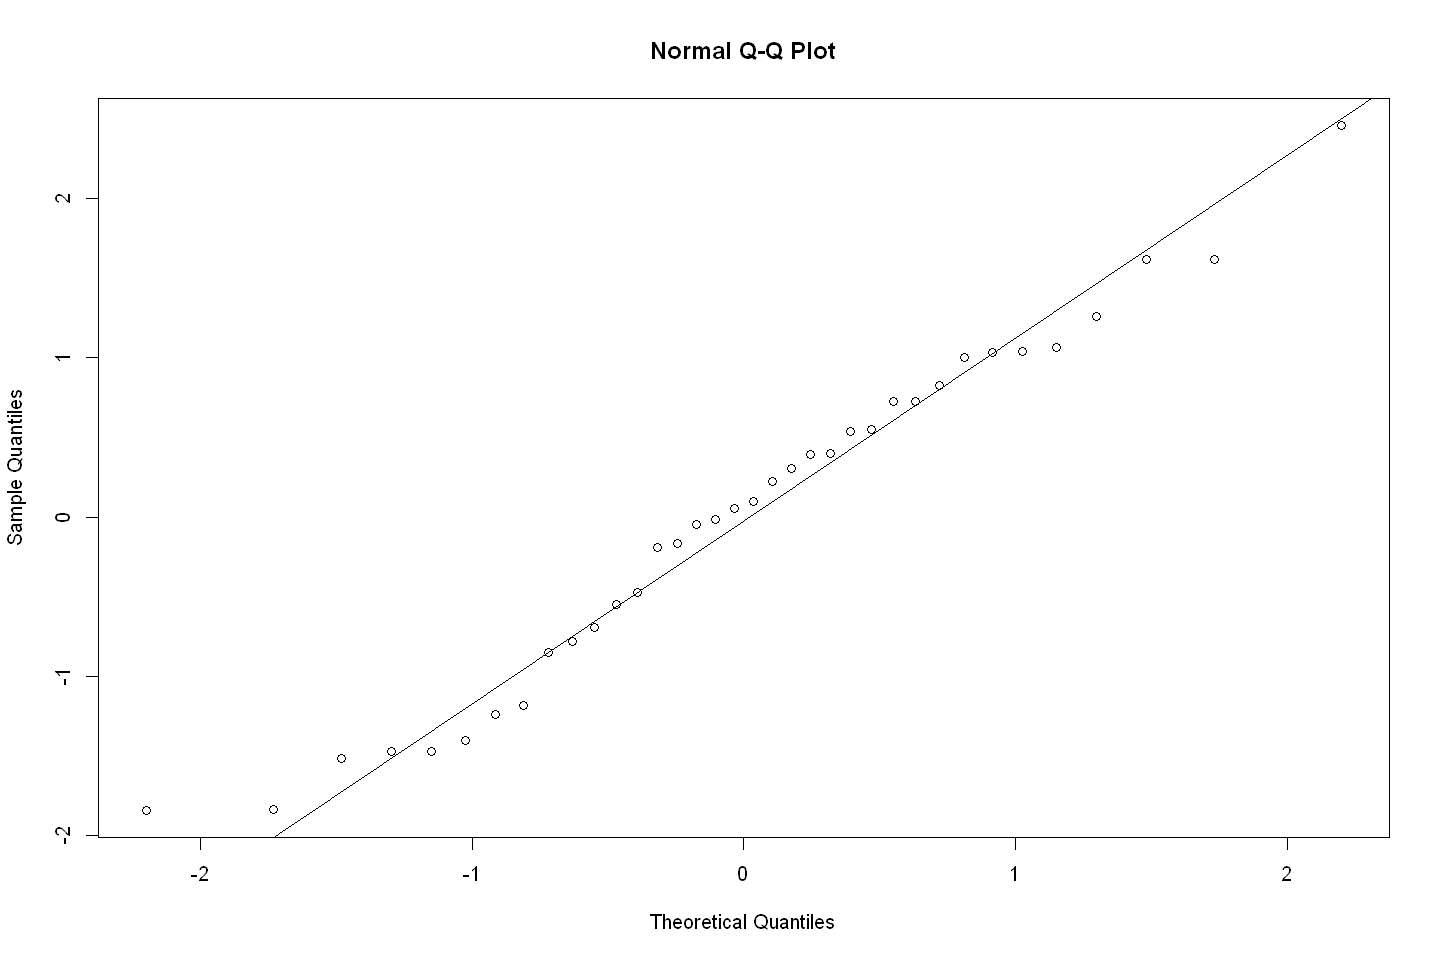

In [16]:
options(repr.plot.width=12, repr.plot.height=8)
qqnorm(model$resid); qqline(model$resid)

The residuals look normal, except maybe for the first point in the lower tail.  Let's do a Shapiro-Wilk test anyhow:

In [17]:
shapiro.test(model$resid)


	Shapiro-Wilk normality test

data:  model$resid
W = 0.97292, p-value = 0.5105


The Shapiro-Wilk test fails to reject normality.

**(c)**

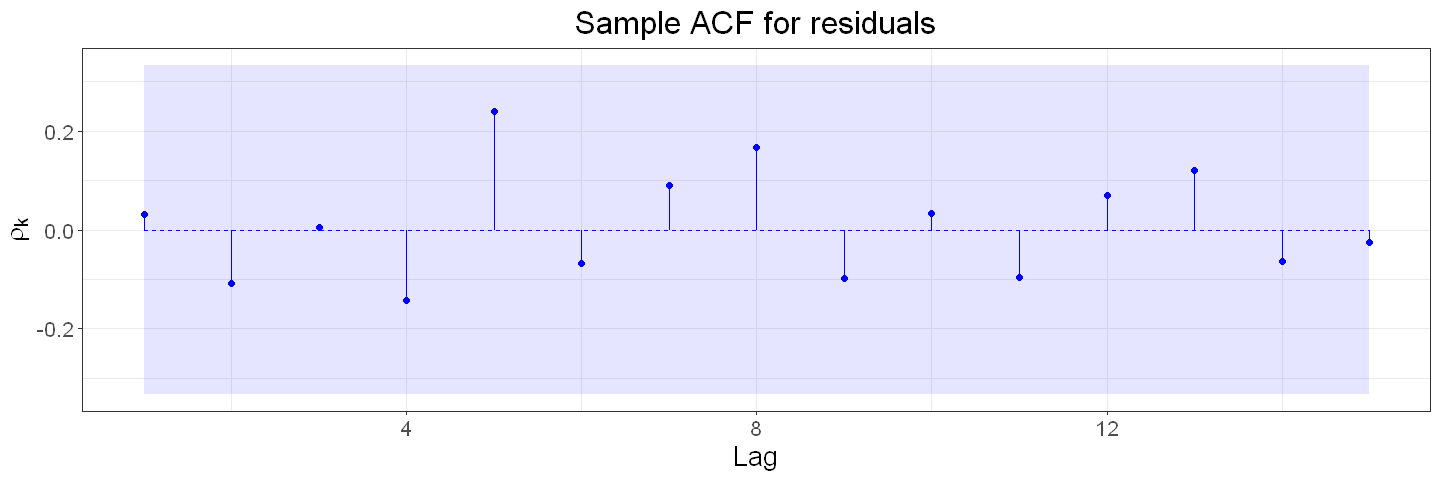

In [18]:
r = acf(model$resid, lag.max=15, plot=F)$acf[-1]
se = 1 / sqrt(length(Y))
plot_acf_with_bounds(r, - 2 * se, + 2*se, title='Sample ACF for residuals')

ACF suggests the residuals are white noise.

**(d)**

In [19]:
ljung.box.test(acf(model$resid, lag.max=6, plot=F)$acf[-1], n=length(Y), k_ma=1)

$`X-squared`
[1] 3.668276

$df
[1] 5

$`p-value`
[1] 0.5980919

The test does not reject randomness of error based on the first 6 autocorrelations.

**Exercise 8.6**.  Simulate an AR(2) model with $n = 48$, $\phi_1 = 1.5$, and $\phi_2 = −0.75$.

**(a)** Fit the correctly specified AR(2) model and look at a time series plot of the residuals.  Does the plot support the AR(2) specification?

**(b)** Display a normal quantile-quantile plot of the standardized residuals.  Does the plot support the AR(2) specification?

**(c)** Display the sample ACF of the residuals.  Does the plot support the AR(2) specification?

**(d)** Calculate the Ljung-Box statistic summing to K = 12.  Does this statistic support the AR(2) specification?

**Solution**.

In [20]:
set.seed(2000)
Y = arima.sim(model=list(ar=c(1.5, -0.75)), n=48)

**(a)**

In [21]:
model = arima(Y, order=c(2,0,0), method='ML')

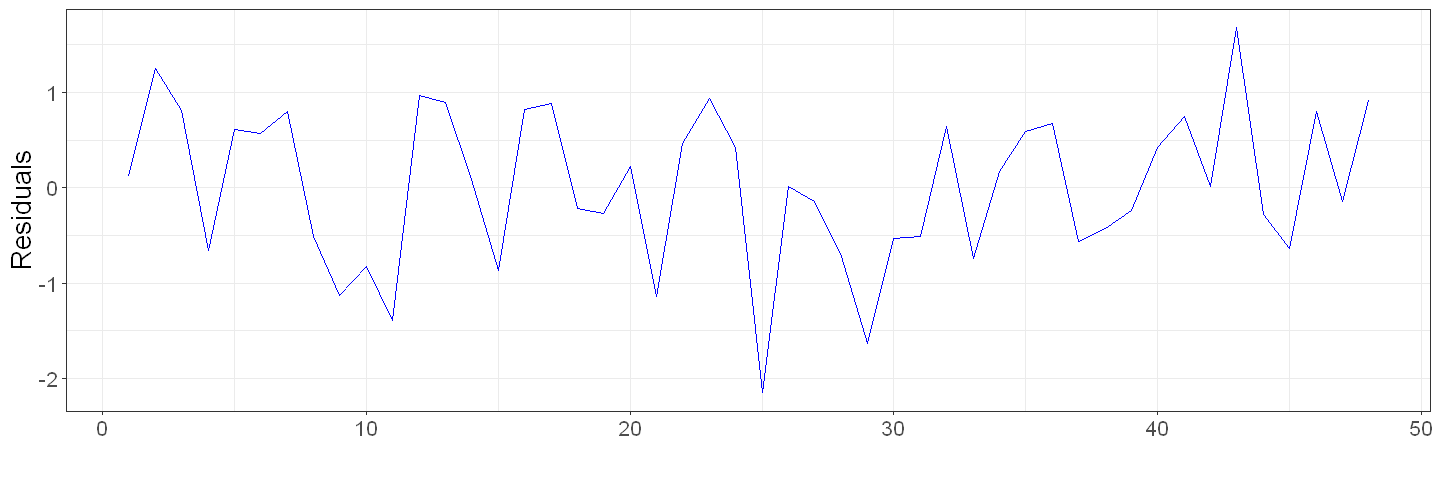

In [22]:
options(repr.plot.width=12, repr.plot.height=4)

ggplot() + 
  geom_line(aes(x=1:length(Y), y=c(model$resid)), color='blue', na.rm=T) +
  xlab('') + ylab('Residuals') +
  theme_bw() + theme(text = element_text(size=16))

Residuals look random.

**(b)**

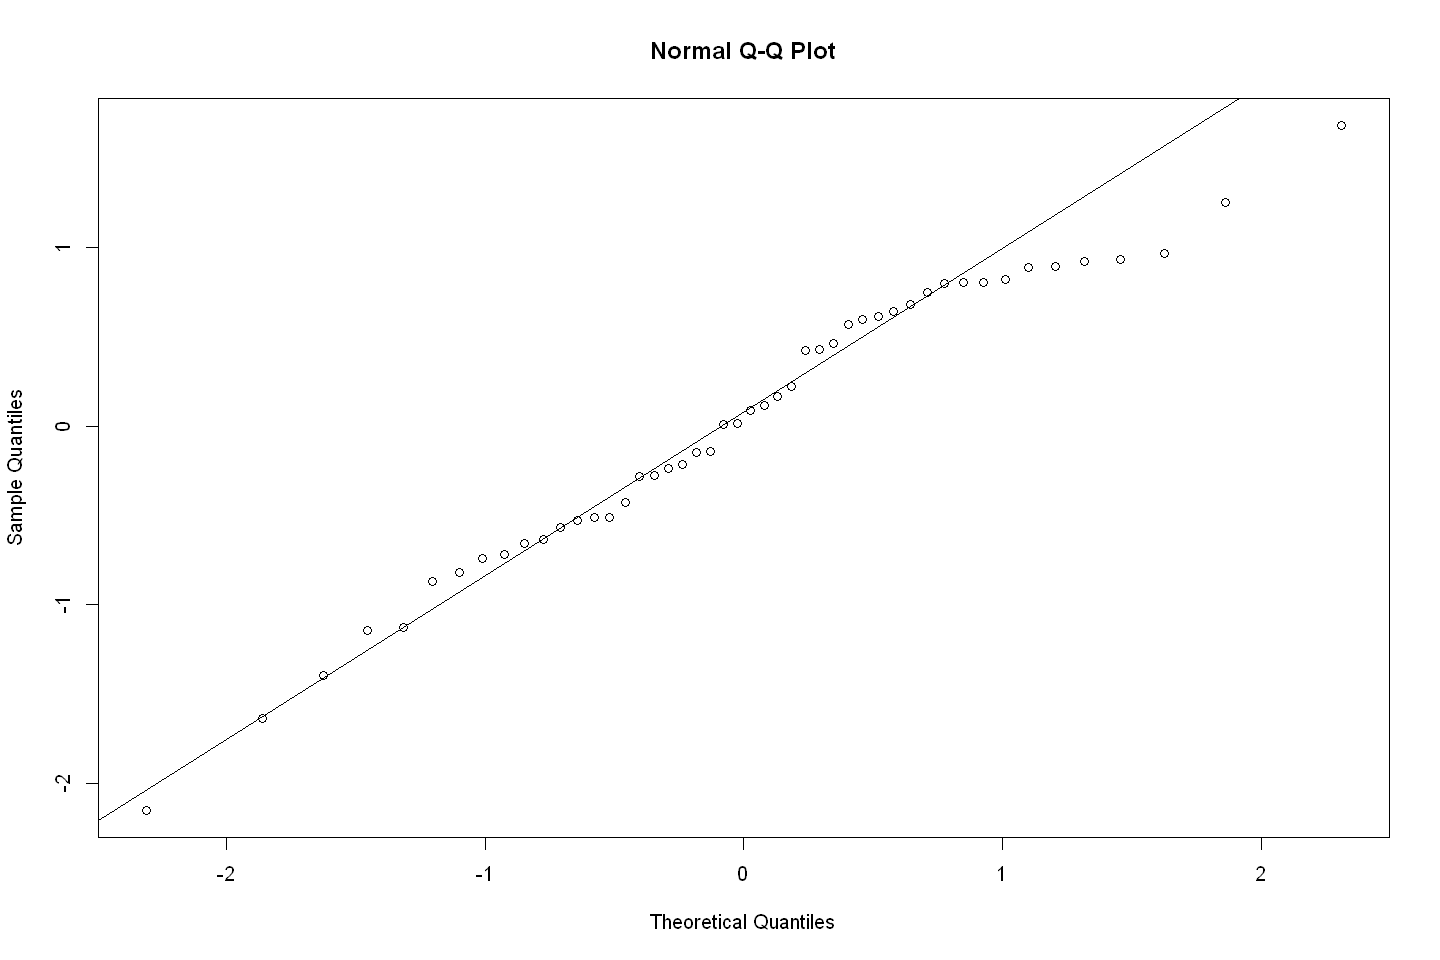

In [23]:
options(repr.plot.width=12, repr.plot.height=8)
qqnorm(model$resid); qqline(model$resid)

The upper tail of the plot looks suspect.  Let's do a Shapiro-Wilk test for normality on the residuals:

In [24]:
shapiro.test(model$resid)


	Shapiro-Wilk normality test

data:  model$resid
W = 0.97261, p-value = 0.3191


The Shapiro-Wilk test fails to reject normality.

**(c)**

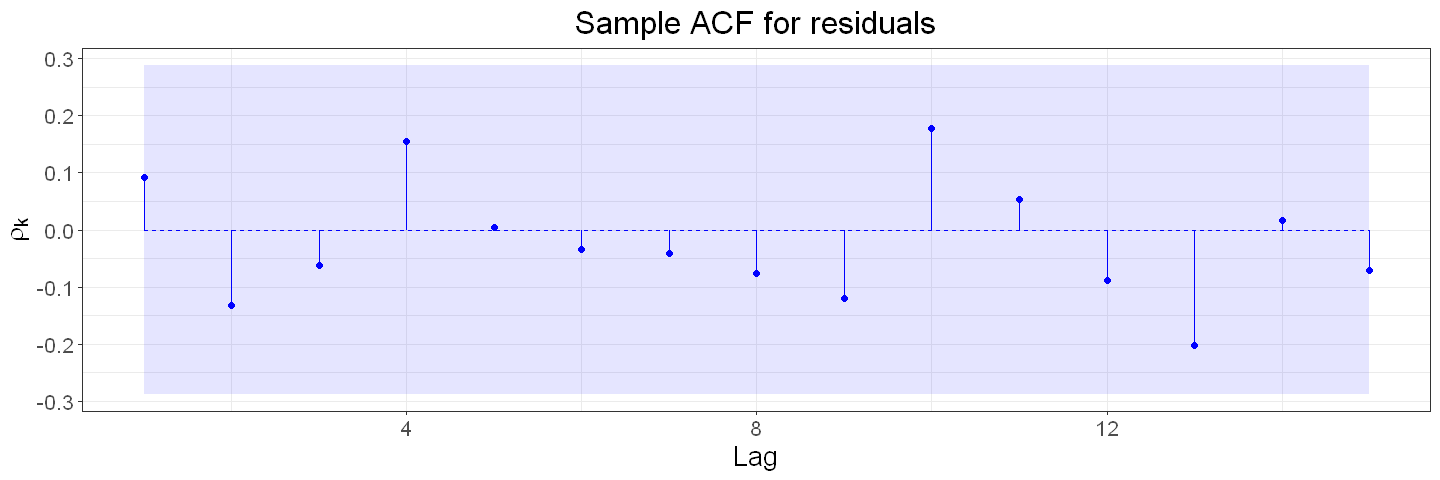

In [25]:
r = acf(model$resid, lag.max=15, plot=F)$acf[-1]
se = 1 / sqrt(length(Y))
plot_acf_with_bounds(r, - 2 * se, + 2*se, title='Sample ACF for residuals')

ACF suggests the residuals are white noise.

**(d)**

In [26]:
ljung.box.test(acf(model$resid, lag.max=12, plot=F)$acf[-1], n=length(Y), k_ar=2)

$`X-squared`
[1] 6.40808

$df
[1] 10

$`p-value`
[1] 0.7798927

The test does not reject randomness of error based on the first 12 autocorrelations.